# Exercise 10

Diogo Gomes nº26843

Using the dataset in EFIplus_medit.zip:
1. Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the Douro, Tejo, Mondego and Minho basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.
2. Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the ‘Catchment_name’ as a grouping variable.
3. Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous exercises), using the Douro, Tejo, Mondego and Minho basins as the pre-determined groups. Produce a biplot with ‘Catchment_name’ as a grouping variable.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

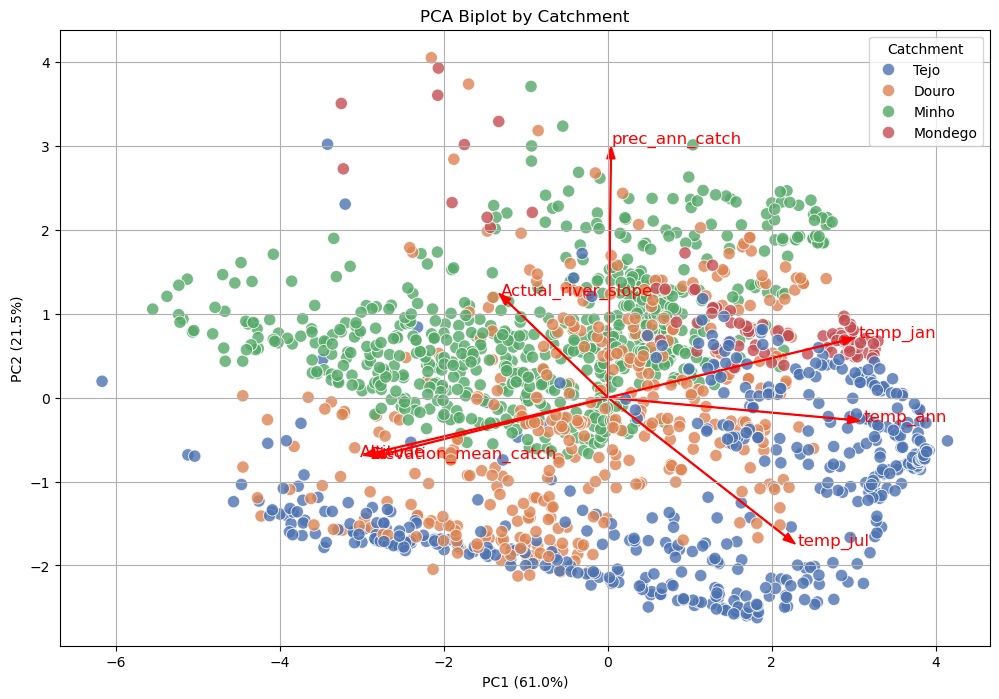

In [ ]:
# Load data
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

target_catchments = ['Tejo', 'Douro', 'Mondego', 'Minho']
df_filtered = df[df['Catchment_name'].isin(target_catchments)]
env_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch','prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df_clean = df_filtered.dropna(subset=env_vars)

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[env_vars])

# Run PCA
pca = PCA()
pca_scores = pca.fit_transform(X_scaled)

# plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1], 
                hue=df_clean['Catchment_name'], 
                palette='deep', s=80, alpha=0.8)

# add vectors
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(env_vars):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, 
              color='r', width=0.01, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, 
             color='r', fontsize=12)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot by Catchment')
plt.legend(title='Catchment')
plt.grid(True)
plt.show()

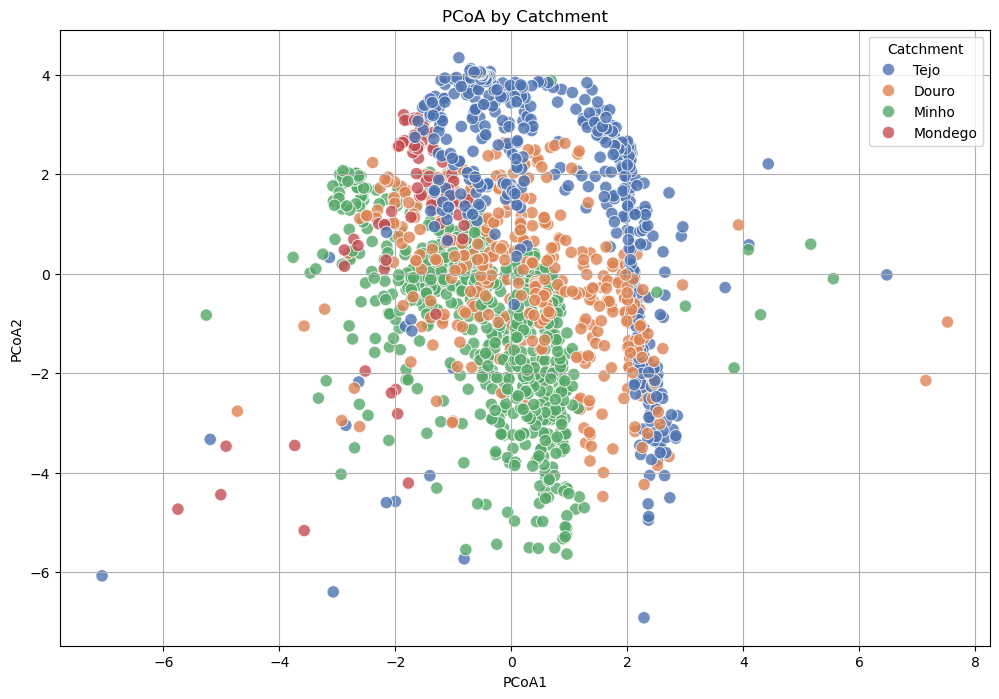

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

# euclidean distance matrix
distance_matrix = pairwise_distances(X_scaled, metric='euclidean')

# Run PCoA
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pcoa_scores = mds.fit_transform(distance_matrix)

# plot results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pcoa_scores[:, 0], y=pcoa_scores[:, 1], 
                hue=df_clean['Catchment_name'], 
                palette='deep', s=80, alpha=0.8)
plt.xlabel('PCoA1')
plt.ylabel('PCoA2')
plt.title('PCoA by Catchment')
plt.legend(title='Catchment')
plt.grid(True)
plt.show()

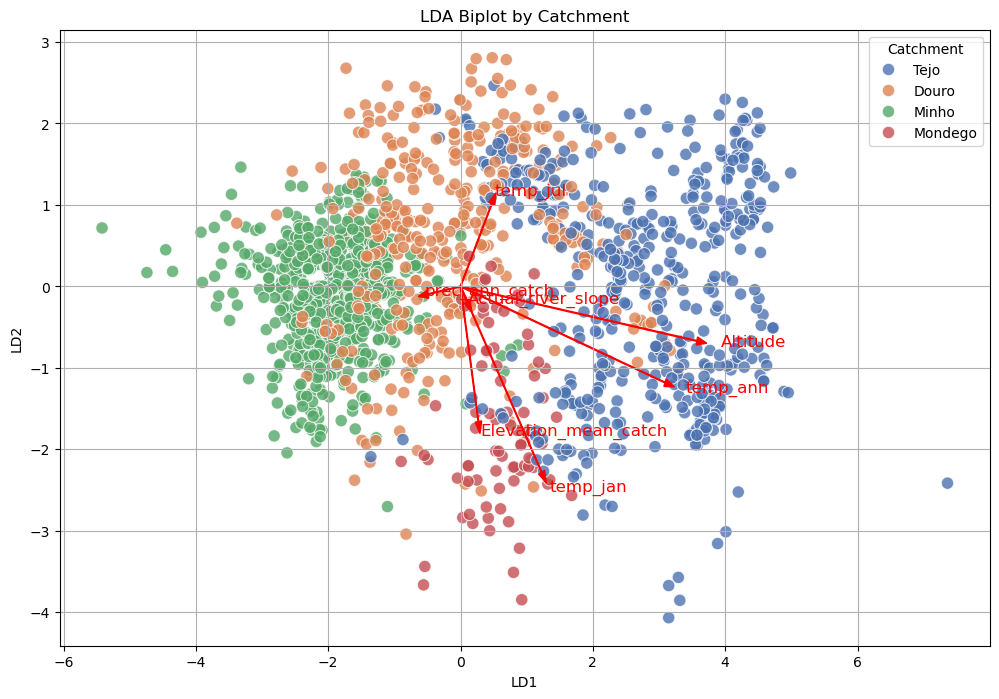

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Run LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_scores = lda.fit_transform(X_scaled, df_clean['Catchment_name'])

# plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=lda_scores[:, 0], y=lda_scores[:, 1] if lda_scores.shape[1] > 1 else [0]*len(lda_scores),
                hue=df_clean['Catchment_name'], 
                palette='deep', s=80, alpha=0.8)

scalings = lda.scalings_[:, :2]

for i, var in enumerate(env_vars):
    plt.arrow(0, 0, scalings[i, 0], scalings[i, 1] if lda_scores.shape[1] > 1 else 0, 
              color='r', width=0.01, head_width=0.1)
    plt.text(scalings[i, 0]*1.1, scalings[i, 1]*1.1 if lda_scores.shape[1] > 1 else 0, 
             var, color='r', fontsize=12)

plt.xlabel('LD1')
plt.ylabel('LD2' if lda_scores.shape[1] > 1 else '')
plt.title('LDA Biplot by Catchment')
plt.legend(title='Catchment')
plt.grid(True)
plt.show()